In [2]:
!ls data/piezo_1st/*

data/piezo_1st/ALL0000:
F0000CH1.CSV  F0000CH2.CSV  F0000TEK.RLE  F0000TEK.SET

data/piezo_1st/ALL0001:
F0001CH1.CSV  F0001CH2.CSV  F0001TEK.RLE  F0001TEK.SET

data/piezo_1st/ALL0002:
F0002CH1.CSV  F0002CH2.CSV  F0002TEK.RLE  F0002TEK.SET

data/piezo_1st/ALL0003:
F0003CH1.CSV  F0003CH2.CSV  F0003TEK.RLE  F0003TEK.SET


In [3]:
import pandas as pd 
import numpy as np
import scipy.signal as ssig 
from matplotlib import pyplot as plt
import math as math
import control as ctrl
from control import matlab as mt

In [4]:
df = pd.read_csv('data/piezo_1st/ALL0002/F0002CH1.CSV', header=None)
samplingPeriod = float(df.iloc[1,1])
samplingFrequency = 1/samplingPeriod
df.head(30)

,0,1,2,3,4,5
0,Record Length,2.500000e+03,NaN,0.000,1.64,NaN
1,Sample Interval,1.000000e-03,NaN,0.001,1.68,NaN
2,Trigger Point,0.000000000000e+00,NaN,0.002,1.64,NaN
3,NaN,NaN,NaN,0.003,1.64,NaN
4,NaN,NaN,NaN,0.004,1.64,NaN
5,NaN,NaN,NaN,0.005,1.68,NaN
6,Source,CH1,NaN,0.006,1.64,NaN
7,Vertical Units,V,NaN,0.007,1.68,NaN
8,Vertical Scale,1.000000e+00,NaN,0.008,1.64,NaN
9,Vertical Offset,-2.960000e+00,NaN,0.009,1.68,NaN


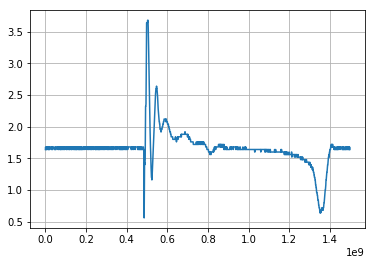

In [21]:
signal = df.iloc[:1500,4]
plt.plot(time/samplingPeriod,signal[:-1])
plt.grid()
plt.show()

In [22]:
x = np.array(signal)
time =  np.arange(len(x[1:1500]))/samplingPeriod

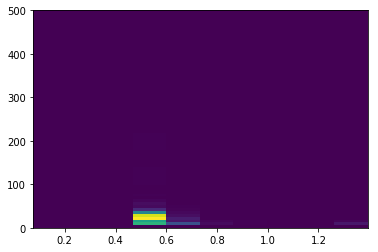

In [26]:
f, t ,s = ssig.spectrogram(signal, samplingFrequency,
#                            window=ssig.windows.blackman(np.arange(len(x))/10, sym=False),
                           nperseg=150)
plt.pcolormesh(t, f, s)
plt.show()

In [99]:
# filterTal = 2*math.pi/100
filterTal = 0.00001

lowPassFilter = ctrl.tf([filterTal], [1, filterTal])
# lowPassFilter = ctrl.tf(0.5, [1, 0])
lowPassFilter


  1e-05
---------
s + 1e-05

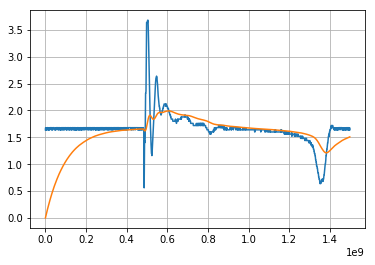

In [100]:
data = mt.lsim(lowPassFilter, x[1:1500], time)


plt.plot(time/samplingPeriod, signal[:-1])
plt.plot(time/samplingPeriod, data[0])
plt.grid()
plt.show()
# ?ssig.lsim
# lowPassFilter

In [78]:
mt.c2d(lowPassFilter, samplingPeriod)


1e-08
-----
z - 1

dt = 0.001

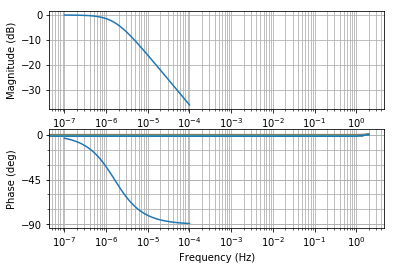

In [79]:
bodeData = mt.bode(lowPassFilter)
plt.plot(bodeData)
plt.show()